In [2]:
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt

In [3]:
lfw = fetch_lfw_people(min_faces_per_person=100,resize=1)
print(lfw.keys())
print(lfw.data.shape)

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
(1140, 11750)


In [32]:
from sklearn.model_selection import train_test_split
X = lfw.images
y = lfw.target
Xtrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size=0.25, random_state=33)
print(yTrain.shape)
print(yTest.shape)

(855,)
(285,)


nb. of keypoints: 
(1140, 125, 94)


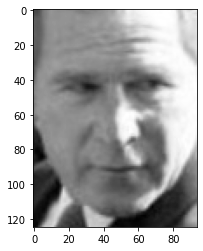

In [33]:
import cv2
print('nb. of keypoints: ')
print(lfw.images.shape)
kp = list()
des = list()
sift = cv2.SIFT_create()
images = Xtrain
for i in range(images.shape[0]):
    img = images[i]
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    plt.imshow(img, cmap=plt.cm.gray)
    kpTmp, desTmp = sift.detectAndCompute(img,None)
    kp.append(kpTmp)
    des.append(desTmp)
    #print(len(kp))

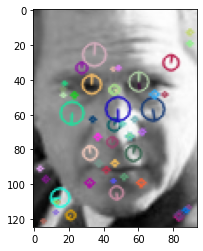

In [16]:
kpimg=cv2.drawKeypoints(img,
                      kp[0],
                      0,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(kpimg)

- Matrices confusion
- Comparaisons résultats

In [20]:
from sklearn import svm

In [26]:
classif = svm.SVC(kernel='linear')
classif.fit(des, yTrain)
print('prediction class: ', classif.predict(Xtest))
print('support vectors: ', classif.support_vectors_)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (855,) + inhomogeneous part.